In [43]:
# Drew Lesh
# 11/18/25
# IBM Data Analyst Capstone Project - Data Visualization

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# load data
df = pd.read_csv('survey_data.csv')

df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


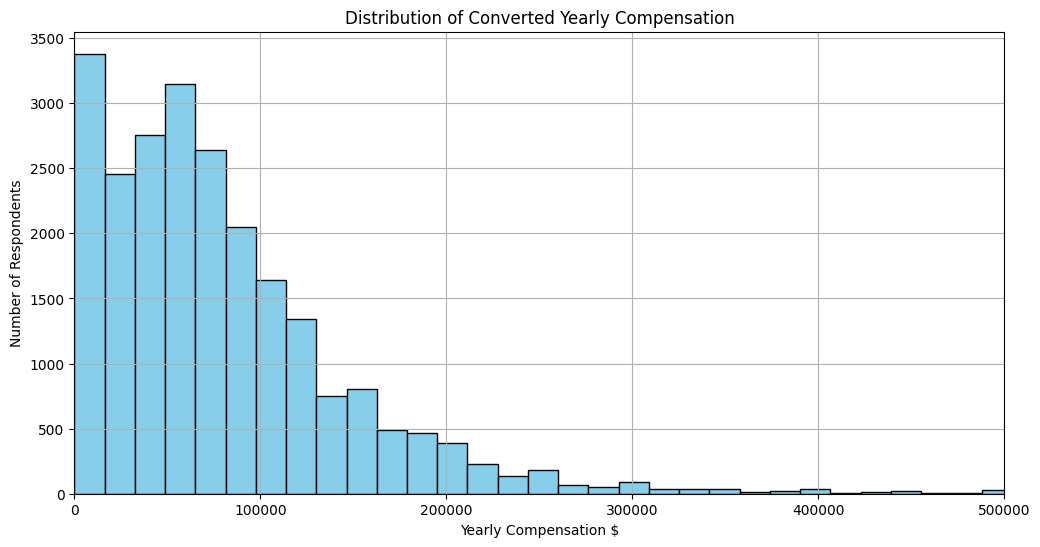

In [19]:
# HISTOGRAM OF YEARLY COMPENSATION

# Drop Missing Values
df['ConvertedCompYearly'] = df[['ConvertedCompYearly']].dropna()
#print(df['ConvertedCompYearly'].isna().sum())

plt.figure(figsize=(12,6))
plt.hist(df['ConvertedCompYearly'], bins=1000, color='skyblue', edgecolor='black')
plt.xlim(0, 500000)
plt.title('Distribution of Converted Yearly Compensation')
plt.xlabel('Yearly Compensation $')
plt.ylabel('Number of Respondents')
plt.grid(True)
plt.show()

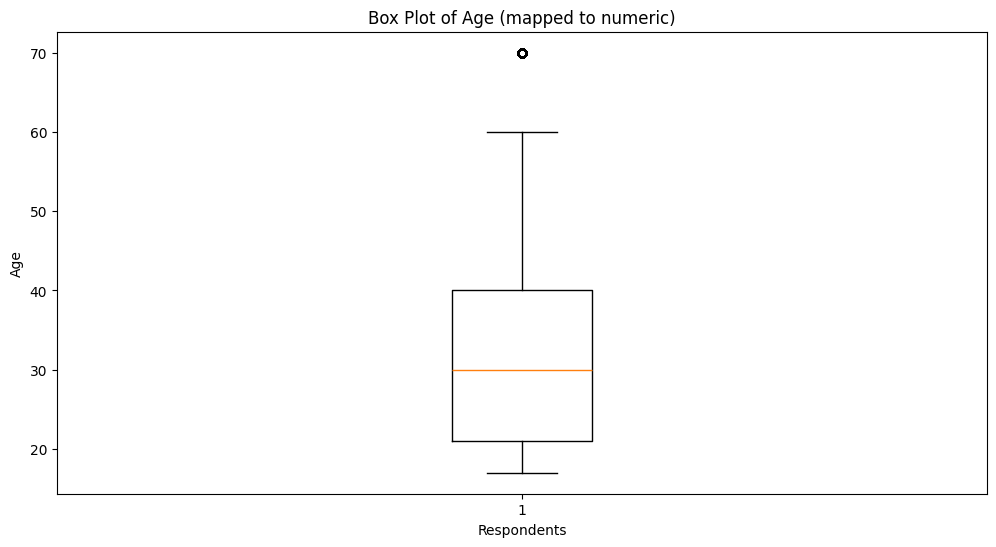

In [20]:
# BOX PLOT OF AGE

# map age to numerical medians
age_map = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None
}
df['Age_num'] = df['Age'].map(age_map)
#print(df['Age_num'].value_counts())

plt.figure(figsize=(12,6))
plt.boxplot(df['Age_num'].dropna())
plt.xlabel("Respondents")
plt.ylabel('Age')
plt.title('Box Plot of Age (mapped to numeric)')
plt.show()

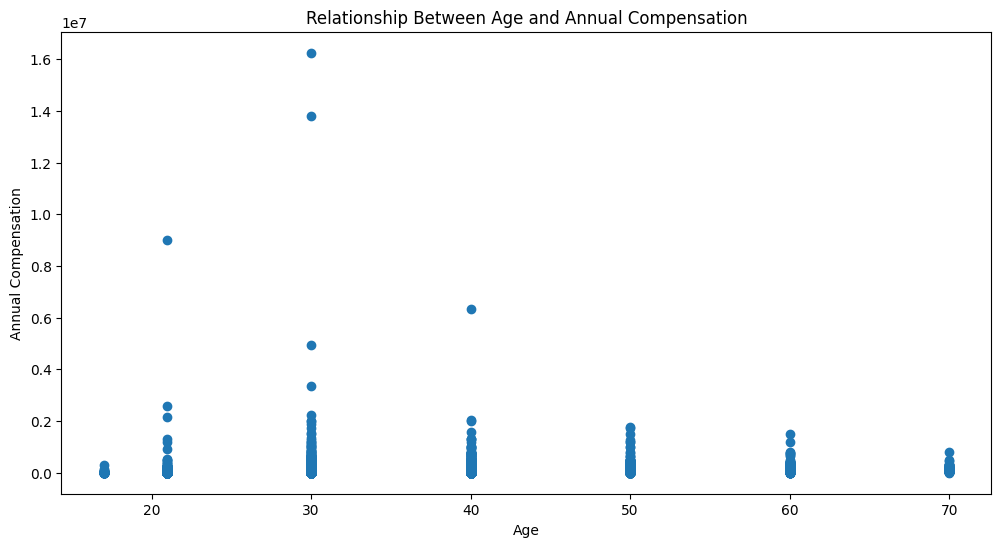

In [22]:
# SCATTER PLOT OF AGE NUMERIC AND YEARLY COMPENSATION

plt.figure(figsize=(12,6))
plt.scatter(df['Age_num'], df['ConvertedCompYearly'])
plt.xlabel('Age')
plt.ylabel('Annual Compensation')
plt.title('Relationship Between Age and Annual Compensation')
plt.show()

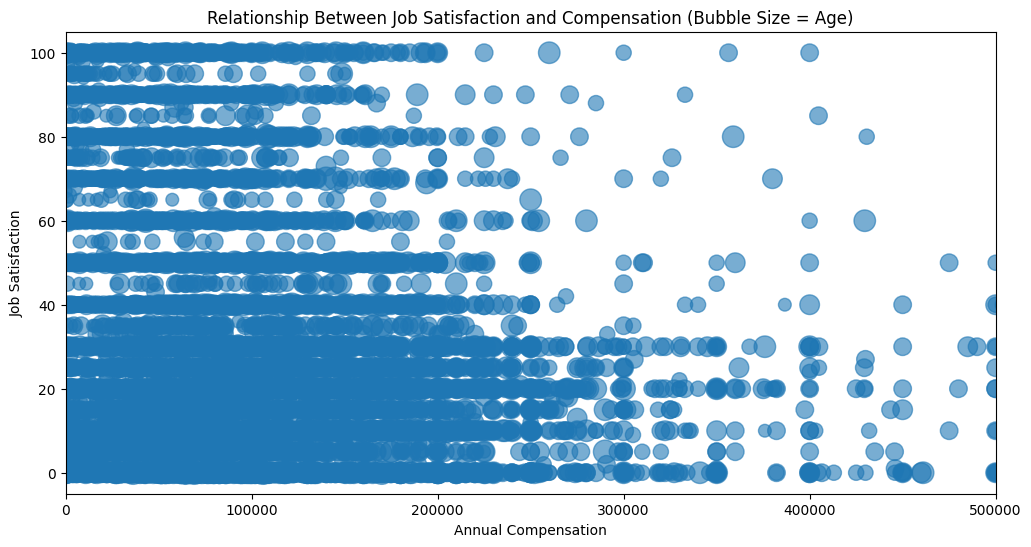

In [32]:
"""
BUBBLE PLOT OF YEARLY COMPENSATION
AND JOB SATISFACTION WITH AGE AS BUBBLE SIZE
"""

df_bubble = df[['ConvertedCompYearly', 'JobSatPoints_6', 'Age_num']].dropna()

plt.figure(figsize=(12,6))
plt.scatter(
    df_bubble['ConvertedCompYearly'],
    df_bubble['JobSatPoints_6'],
    s=df_bubble['Age_num']*2**2,
    alpha=0.6
)


plt.xlim(0,500000)
plt.xlabel('Annual Compensation')
plt.ylabel('Job Satisfaction')
plt.title('Relationship Between Job Satisfaction and Compensation (Bubble Size = Age)')
plt.show()


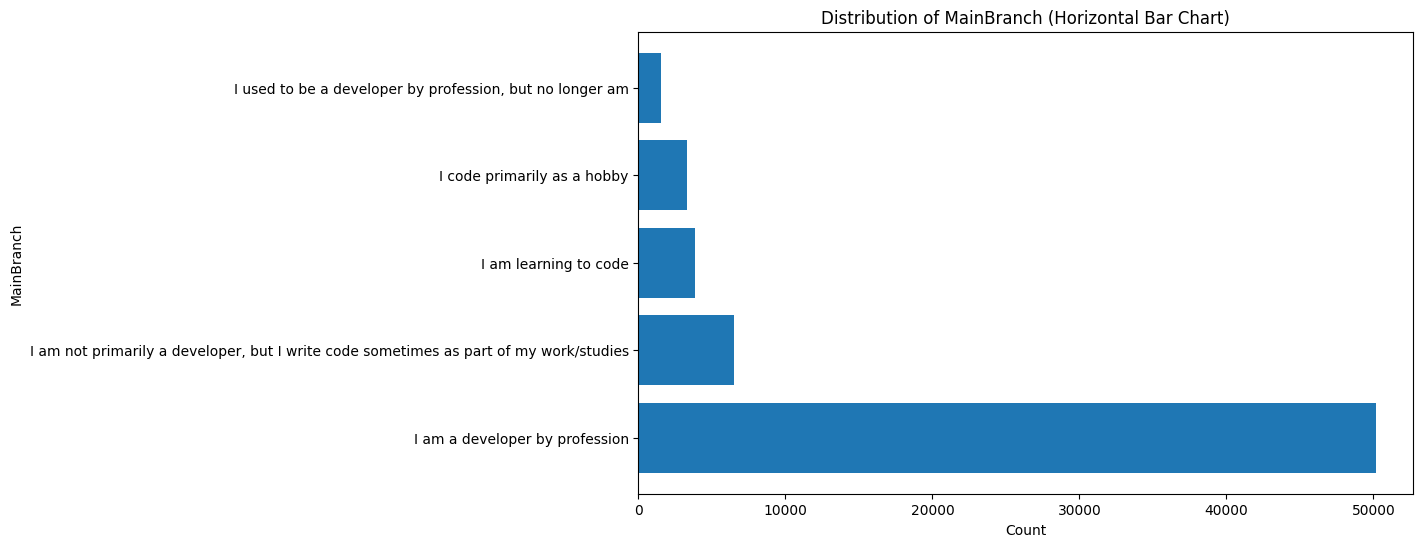

In [33]:
# HORIZONTAL BAR CHART OF MAINBRANCH DISTRIBUTION

mainbranch_counts = df['MainBranch'].value_counts()

plt.figure(figsize=(10,6))
plt.barh(mainbranch_counts.index, mainbranch_counts.values)
plt.xlabel('Count')
plt.ylabel('MainBranch')
plt.title('Distribution of MainBranch (Horizontal Bar Chart)')
plt.show()

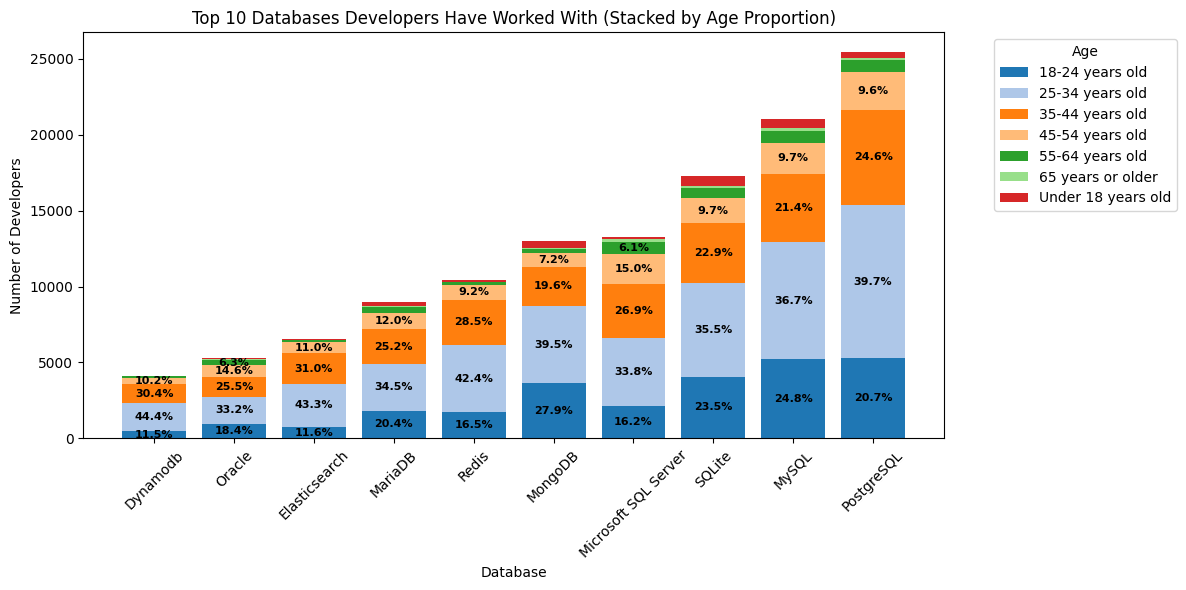

In [37]:
"""
VERTICAL STACKED BAR CHART OF TOP 10 PROGRAMMING LANGUAGES
RESPONDENTS WANT TO WORK WITH BY AGE
"""

# Explode databases and filter ages
df_verticalbar = df[['DatabaseHaveWorkedWith', 'Age']].dropna()
df_verticalbar['DatabaseHaveWorkedWith'] = df_verticalbar['DatabaseHaveWorkedWith'].str.split(';')
df_verticalbar = df_verticalbar.explode('DatabaseHaveWorkedWith')

# Filter top 10 databases
top10_dbs = df_verticalbar['DatabaseHaveWorkedWith'].value_counts().head(10).index
df_top10 = df_verticalbar[df_verticalbar['DatabaseHaveWorkedWith'].isin(top10_dbs)]

# Exclude "Prefer not to say"
df_top10 = df_top10[df_top10['Age'] != 'Prefer not to say']

# Count by database and age
age_counts = df_top10.groupby(['DatabaseHaveWorkedWith', 'Age']).size().unstack(fill_value=0)

# Sort bars ascending
age_counts['total'] = age_counts.sum(axis=1)
age_counts = age_counts.sort_values('total')
age_counts = age_counts.drop(columns='total')

# Plot stacked bar chart with tab20 colors
colors = plt.get_cmap('tab20').colors
fig, ax = plt.subplots(figsize=(12,6))
bottoms = pd.Series([0]*len(age_counts), index=age_counts.index)

for i, age in enumerate(age_counts.columns):
    ax.bar(age_counts.index, age_counts[age], bottom=bottoms, label=age, color=colors[i % len(colors)])

    # Add percentage labels only if >5%, bold and black
    for j in range(len(age_counts)):
        val = age_counts[age].iloc[j]
        if val > 0:
            pct = val / age_counts.iloc[j].sum() * 100
            if pct > 5:
                ax.text(j, bottoms.iloc[j] + val/2, f'{pct:.1f}%',
                        ha='center', va='center', fontsize=8, fontweight='bold', color='black')

    # Update bottoms for stacking
    bottoms += age_counts[age]

plt.xlabel('Database')
plt.ylabel('Number of Developers')
plt.title('Top 10 Databases Developers Have Worked With (Stacked by Age Proportion)')
plt.xticks(rotation=45)
plt.legend(title='Age', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()




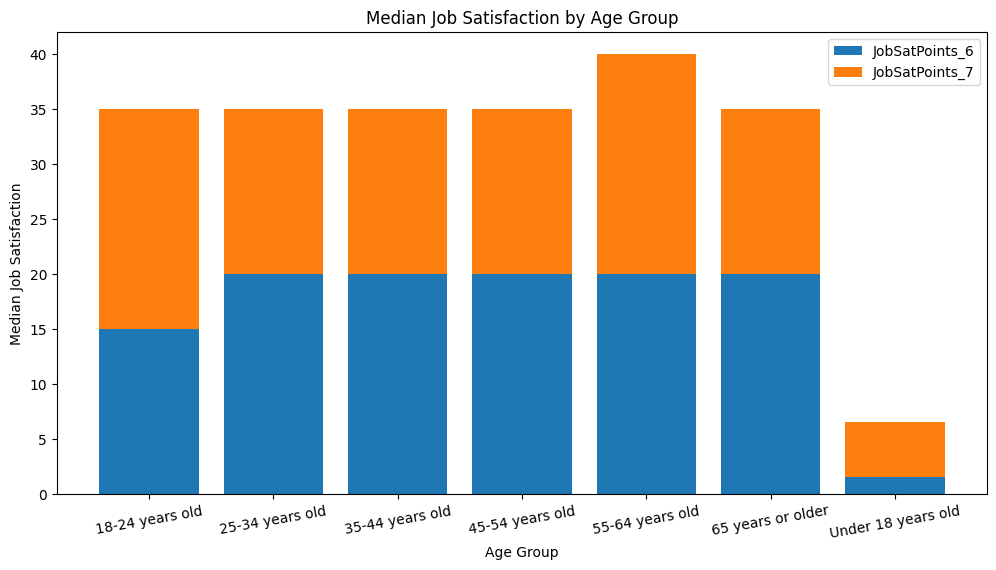

In [38]:
# STACKED BAR CHART OF MEDIAN JOB SAT POINTS BY AGE GROUP

df_stacked = df[['Age', 'JobSatPoints_6', 'JobSatPoints_7']].dropna()
df_stacked = df_stacked[df_stacked['Age'] != 'Prefer not to say']

medians = df_stacked.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

#age_order = list(age_map.keys())
#medians = medians.loc[age_order]

# Stacked bar chart
plt.figure(figsize=(12,6))
plt.bar(medians.index, medians['JobSatPoints_6'], label='JobSatPoints_6')
plt.bar(
    medians.index,
    medians['JobSatPoints_7'],
    bottom=medians['JobSatPoints_6'],
    label='JobSatPoints_7'
)

plt.xticks(rotation=10)
plt.xlabel('Age Group')
plt.ylabel('Median Job Satisfaction')
plt.title('Median Job Satisfaction by Age Group')
plt.legend()
plt.show()

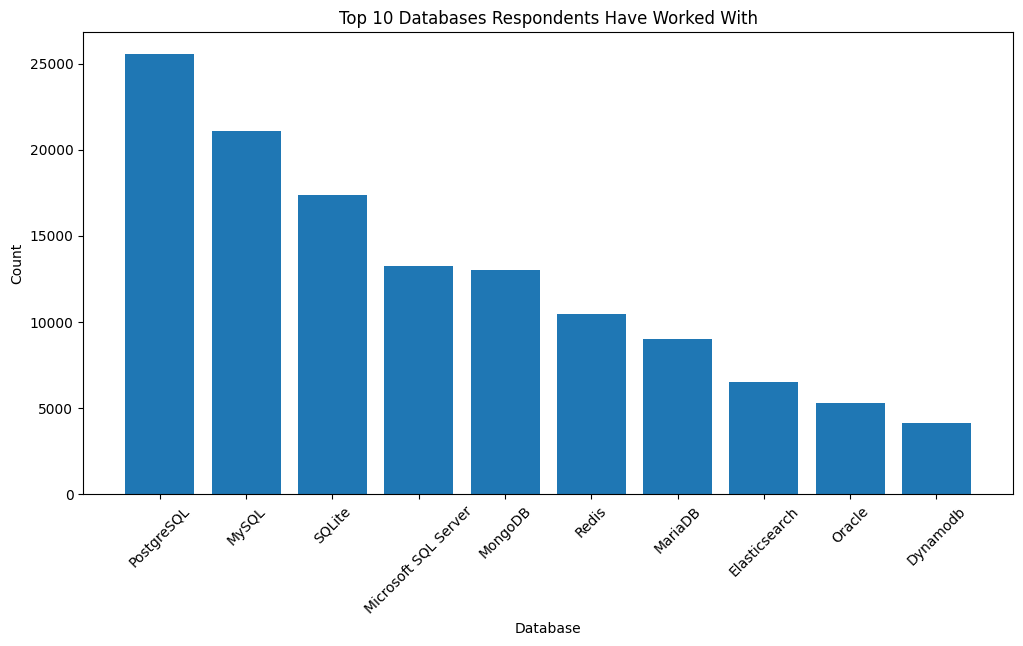

In [39]:
# BAR CHART OF DATABASE POPULARITY

df_db = df['DatabaseHaveWorkedWith'].dropna().str.split(';')
df_db = df_db.explode()

db_counts = df_db.value_counts().head(10)

plt.figure(figsize=(12,6))
plt.bar(db_counts.index, db_counts.values)
plt.xlabel("Database")
plt.ylabel('Count')
plt.title('Top 10 Databases Respondents Have Worked With')
plt.xticks(rotation=45)
plt.show()

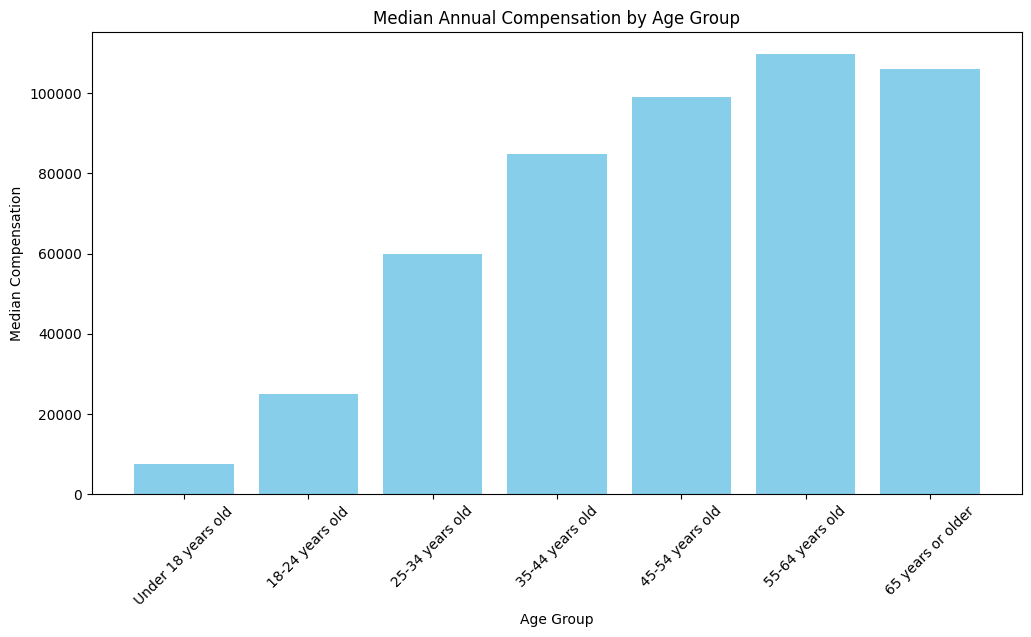

In [40]:
# GROUPED BAR CHART OF MEDIAN COMPENSATION FOR AGE GROUPS

df = df[df['Age'] != 'Prefer not to say']
df_bar1 = df[['Age', 'ConvertedCompYearly']].dropna()

medians_bar1 = df_bar1.groupby('Age')['ConvertedCompYearly'].median()

age_order = list(age_map.keys())
medians_bar1 = medians_bar1.reindex(age_order)

plt.figure(figsize=(12,6))
plt.bar(medians_bar1.index, medians_bar1.values, color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Median Compensation')
plt.title('Median Annual Compensation by Age Group')
plt.xticks(rotation=45)
plt.show()

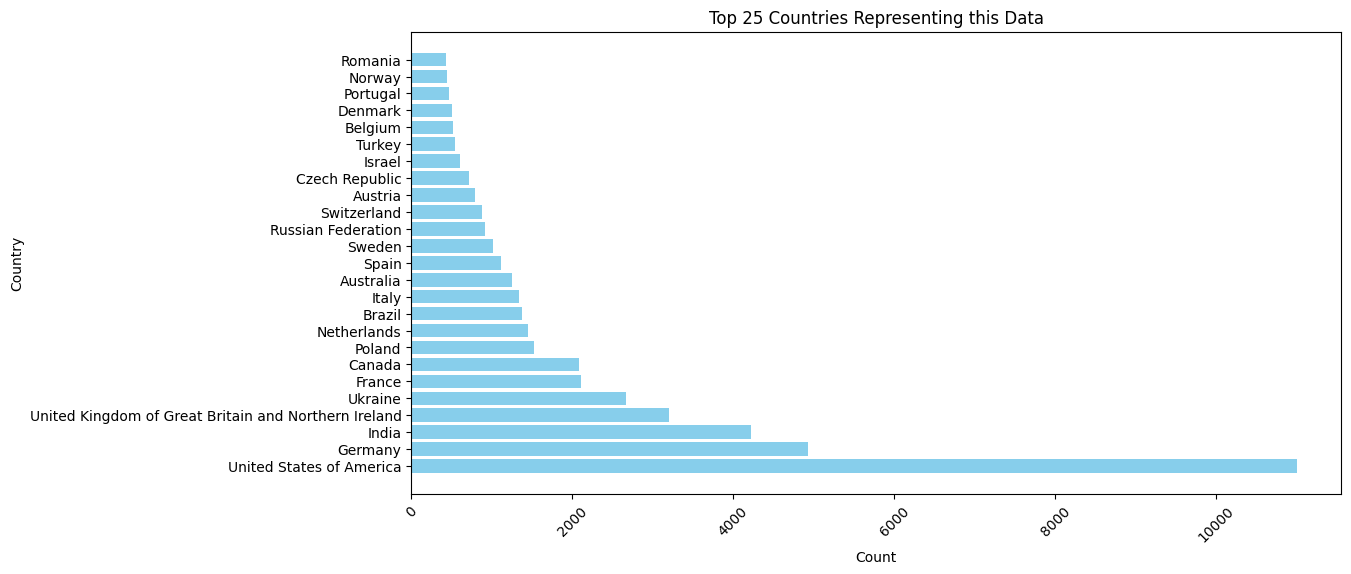

In [41]:
# BAR CHART OF RESPONDENT COUNT BY COUNTRY

country_counts = df['Country'].value_counts().head(25)

plt.figure(figsize=(12,6))
plt.barh(country_counts.index, country_counts.values, color='skyblue')

plt.xlabel("Count")
plt.ylabel("Country")
plt.xticks(rotation=45)
plt.title("Top 25 Countries Representing this Data")
plt.show()